## Project Overview 

- In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data
- Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
- 'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users.

<Strong> Technical knowledge </Strong>

- NLP toolkit to perform tokenization
- Apply feature extraction using Count Vectorizer
- Understand naive Bayes classifiers
- Train naive Bayes classifier model using scikit learn

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
yelp_df = pd.read_csv('/Users/margokim/Downloads/Project 7/yelp.csv')

In [133]:
yelp_df.head(7)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [134]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [135]:
yelp_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

### 1. EDA

In [136]:
yelp_df['length'] = yelp_df['text'].apply(len)

- Frequency of review length : To determine whether our data is long or short.

<AxesSubplot:ylabel='Frequency'>

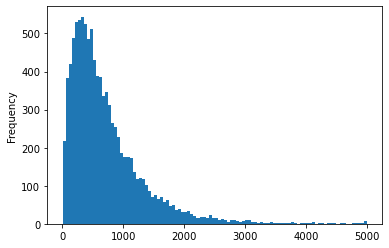

In [137]:
yelp_df['length'].plot(bins = 100, kind = 'hist')

In [138]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [139]:
yelp_df[yelp_df['length'] == 711]['text'].iloc[0]

'I\'m from Chicago so I\'m picky with my pizza--this place does it right (NY style)! I love the "hole in the wall" feel. Every customer that walked in was a regular which was a good sign. I ordered the Mozzarella sticks and a large Monster Pie (Sausage, pepperoni, bell peppers, onion and cheese). The mozzarella sticks took a little while to come out but they were cooked to perfection. They also threw in a few garlic knots which was awesome. The pizza was unbelievable--I think the crumbled sausage really did it! They have great deals like large pie & 20 wings for $20 which I definitely will be taking advantage of during football games on Sunday. Glad to have found a new place where I can also be a regular!'

- Frequency of review Stars : To count frequency of each star rating

<AxesSubplot:xlabel='count', ylabel='stars'>

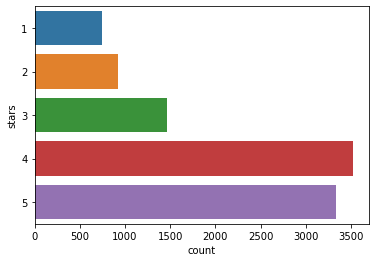

In [140]:
sns.countplot( y = 'stars' , data = yelp_df)

- Explore the relationship between stars and review length<br>
As the rating is higher, review length will be shorter

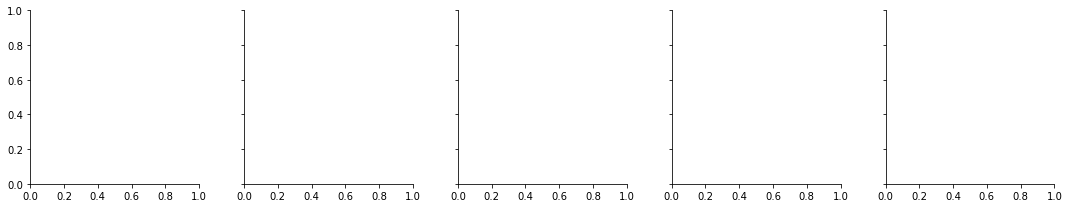

In [141]:
g =sns.FacetGrid(data = yelp_df, col ='stars', col_wrap =5)

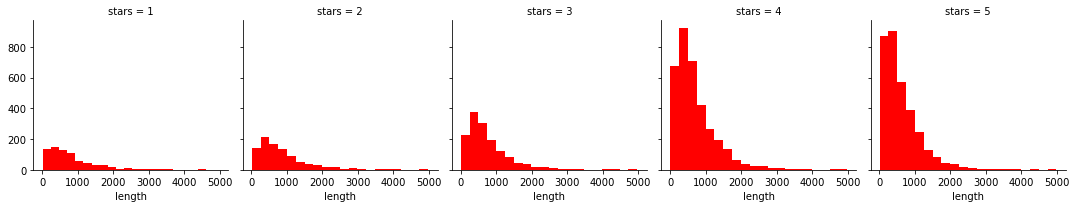

In [142]:
g =sns.FacetGrid(data = yelp_df, col ='stars', col_wrap =5)

g.map(plt.hist, 'length', bins =20, color = 'r')

In [143]:
yelp_df_1 = yelp_df[ yelp_df['stars'] == 1]
yelp_df_5 = yelp_df[ yelp_df['stars'] == 5]

In [144]:
yelp_df_1_5 = pd.concat ([yelp_df_1 ,yelp_df_5 ])

In [145]:
print('1-Stars Review Percentage = ', (len(yelp_df_1))/len(yelp_df_1_5)*100, '%')
print('5-Stars Review Percentage = ', (len(yelp_df_5))/len(yelp_df_1_5)*100, '%')


1-Stars Review Percentage =  18.330885952031327 %
5-Stars Review Percentage =  81.66911404796868 %


/Users/margokim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

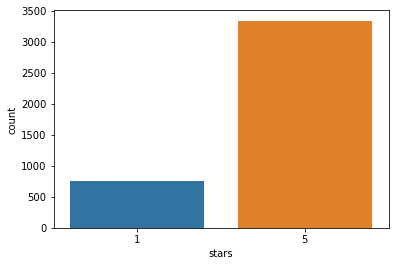

In [146]:
sns.countplot(yelp_df_1_5 ['stars'], label ='Count')

In [147]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/margokim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
import string
string.punctuation

import nltk

In [149]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [150]:
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [151]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [152]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### 2. Data cleaning

In [153]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation  ]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [154]:
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [156]:
#compare original to cleansed data 
print(yelp_df_clean[0])

print(yelp_df_1_5['text'][0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']
My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was exc

### 3. Count Vectorizer to the review

In [157]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
yelp_countvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])


In [158]:
print(vectorizer.get_feature_names()) #every single unique words 

['0', '00s', '01042012', '022010', '03342', '05', '050', '06', '07092008', '075', '09', '090', '095', '1', '10', '100', '1000', '10000', '1000am', '1000pm', '1000x', '1001', '100150', '1007', '100s', '100th', '101', '1011', '1012', '101412', '1015', '102', '1025', '1030', '103011', '1030pm', '10312012', '105', '105°', '1070', '108', '109', '1095', '1099', '10Shrimp', '10X', '10am', '10am4pm', '10close', '10each', '10gallon', '10ish', '10min', '10mins', '10minutes', '10person', '10pm', '10pm12am', '10th', '10thand', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '111', '1113', '1115', '1118', '111807', '111809', '111909', '111PM', '111th', '112', '112312', '1125', '1130', '1130am', '1135', '1139', '114', '1141', '1145', '115', '1150', '1152', '1154', '1155', '115th', '116', '118', '1182010', '1199', '11991079', '11AM', '11PM', '11a3p', '11am', '11ish', '11person', '11pm', '12', '120', '1200', '12000', '1205', '1207', '120year', '121007', '121107', '121207', '1213', '121407', '

/Users/margokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [159]:
yelp_countvectorizer.shape

(4086, 26435)

### 4. Training the model with all dataset

In [160]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values


In [161]:
NB_classifier.fit(yelp_countvectorizer, label)


MultinomialNB()

In [162]:
testing_sample = ['amazing food! highly recommended']

testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)

test_predict


array([5])

In [163]:
testing_sample = ['made me sick, quality is bad']

testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)

test_predict

array([1])

#### 4.1 Divide the data set into training and testing

In [164]:
from sklearn.model_selection import train_test_split

x = yelp_countvectorizer
y = label

print(x.shape)
print(y.shape)


(4086, 26435)
(4086,)


In [165]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2)

In [166]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

### 5. Model Evaluation

In [167]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(x_train)
y_predict_train

array([5, 5, 5, ..., 5, 1, 5])

<AxesSubplot:>

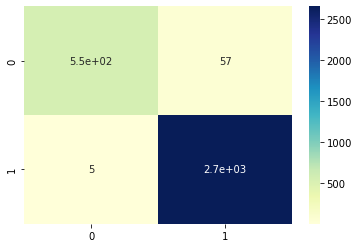

In [168]:
cm = confusion_matrix(y_train, y_predict_train) #results of classification, compare with true label

sns.heatmap(cm, annot = True, cmap='YlGnBu' )

In [169]:
y_predict_test = NB_classifier.predict(x_test)


<AxesSubplot:>

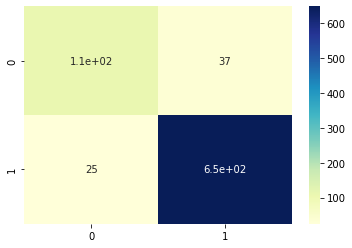

In [170]:
cm = confusion_matrix(y_test, y_predict_test) #results of classification, compare with true label

sns.heatmap(cm, annot = True, cmap='YlGnBu')

In [171]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.81      0.74      0.78       145
           5       0.95      0.96      0.95       673

    accuracy                           0.92       818
   macro avg       0.88      0.85      0.87       818
weighted avg       0.92      0.92      0.92       818



TF-IDF
--
<br>
"Term Frequency - Inverse Document Frequency" is a numerical statistic used to reflect how important a word is to a document in a colletion or corpus of documents. <br><br>
TFIDF is used as a weighting factor during text search processes and text mining.

TF: Term Frequency is used to measure the frequency of term occurrence in a document:<br>
- TF(word) = Number of times the 'word' appears in a document / Total number of terms in the document<br>
<br>
IDF: Inverse Document Frequency is used to measure how important a term is:<br>
- IDF(word) = log_e(Total number of documents / Number of documents with the term 'word' in it)


In [214]:
from sklearn.feature_extraction.text import TfidfTransformer
yelp_tfidf = TfidfTransformer().fit_transform(yelp_countvectorizer)

print(yelp_tfidf[:])

  (0, 26268)	0.08050274254786693
  (0, 26228)	0.09348620453726474
  (0, 26144)	0.07169873884062605
  (0, 26045)	0.15817660070664968
  (0, 25776)	0.06066174442364943
  (0, 25773)	0.12002965112412296
  (0, 25418)	0.14546095084580743
  (0, 25122)	0.2703898166869907
  (0, 24911)	0.14546095084580743
  (0, 24670)	0.12383875478045604
  (0, 24644)	0.13058459416402163
  (0, 24623)	0.04459768543876988
  (0, 24154)	0.06030465665278142
  (0, 23120)	0.09876367605721408
  (0, 22450)	0.09315710247790514
  (0, 22430)	0.1097636086218109
  (0, 22000)	0.06662808805692144
  (0, 21801)	0.13058459416402163
  (0, 20785)	0.09005184530467268
  (0, 19733)	0.14546095084580743
  (0, 19354)	0.09547907116641852
  (0, 19039)	0.12613266766643505
  (0, 18911)	0.1133722206104443
  (0, 18805)	0.10789642494273591
  (0, 18740)	0.08834411964653922
  :	:
  (4085, 16843)	0.12124793979515064
  (4085, 15626)	0.056073903602148346
  (4085, 15041)	0.08518302578980794
  (4085, 14689)	0.13505937049458547
  (4085, 14480)	0.085183025

<AxesSubplot:>

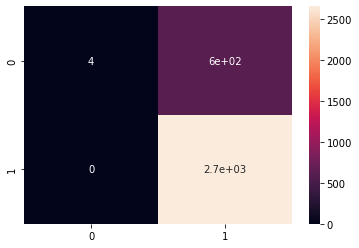

In [215]:
x =yelp_tfidf
y= label

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2)

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)


y_predict_train = NB_classifier.predict(x_train)
y_predict_train

cm = confusion_matrix(y_train, y_predict_train) #results of classification, compare with true label

sns.heatmap(cm, annot = True )

## 6. Conclusion



In our case, naive Bayes classifiers predicted our target(label) with more precision with 92%. 
<br> Through this model, we can predict the customer ratings with given customer reviews. <br>Also, by analyzing word cloud of 5 star reviews, 'place', 'wife', 'star', 'birthday' and 'took' found out to be the most frequent words that appeared in those reviews. 

In [217]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

import numpy as np
import matplotlib.pyplot as plt

yelp_df_clean_5 = yelp_df_5['text'].apply(message_cleaning)

text = yelp_df_clean_5


In [218]:
text = str(text)

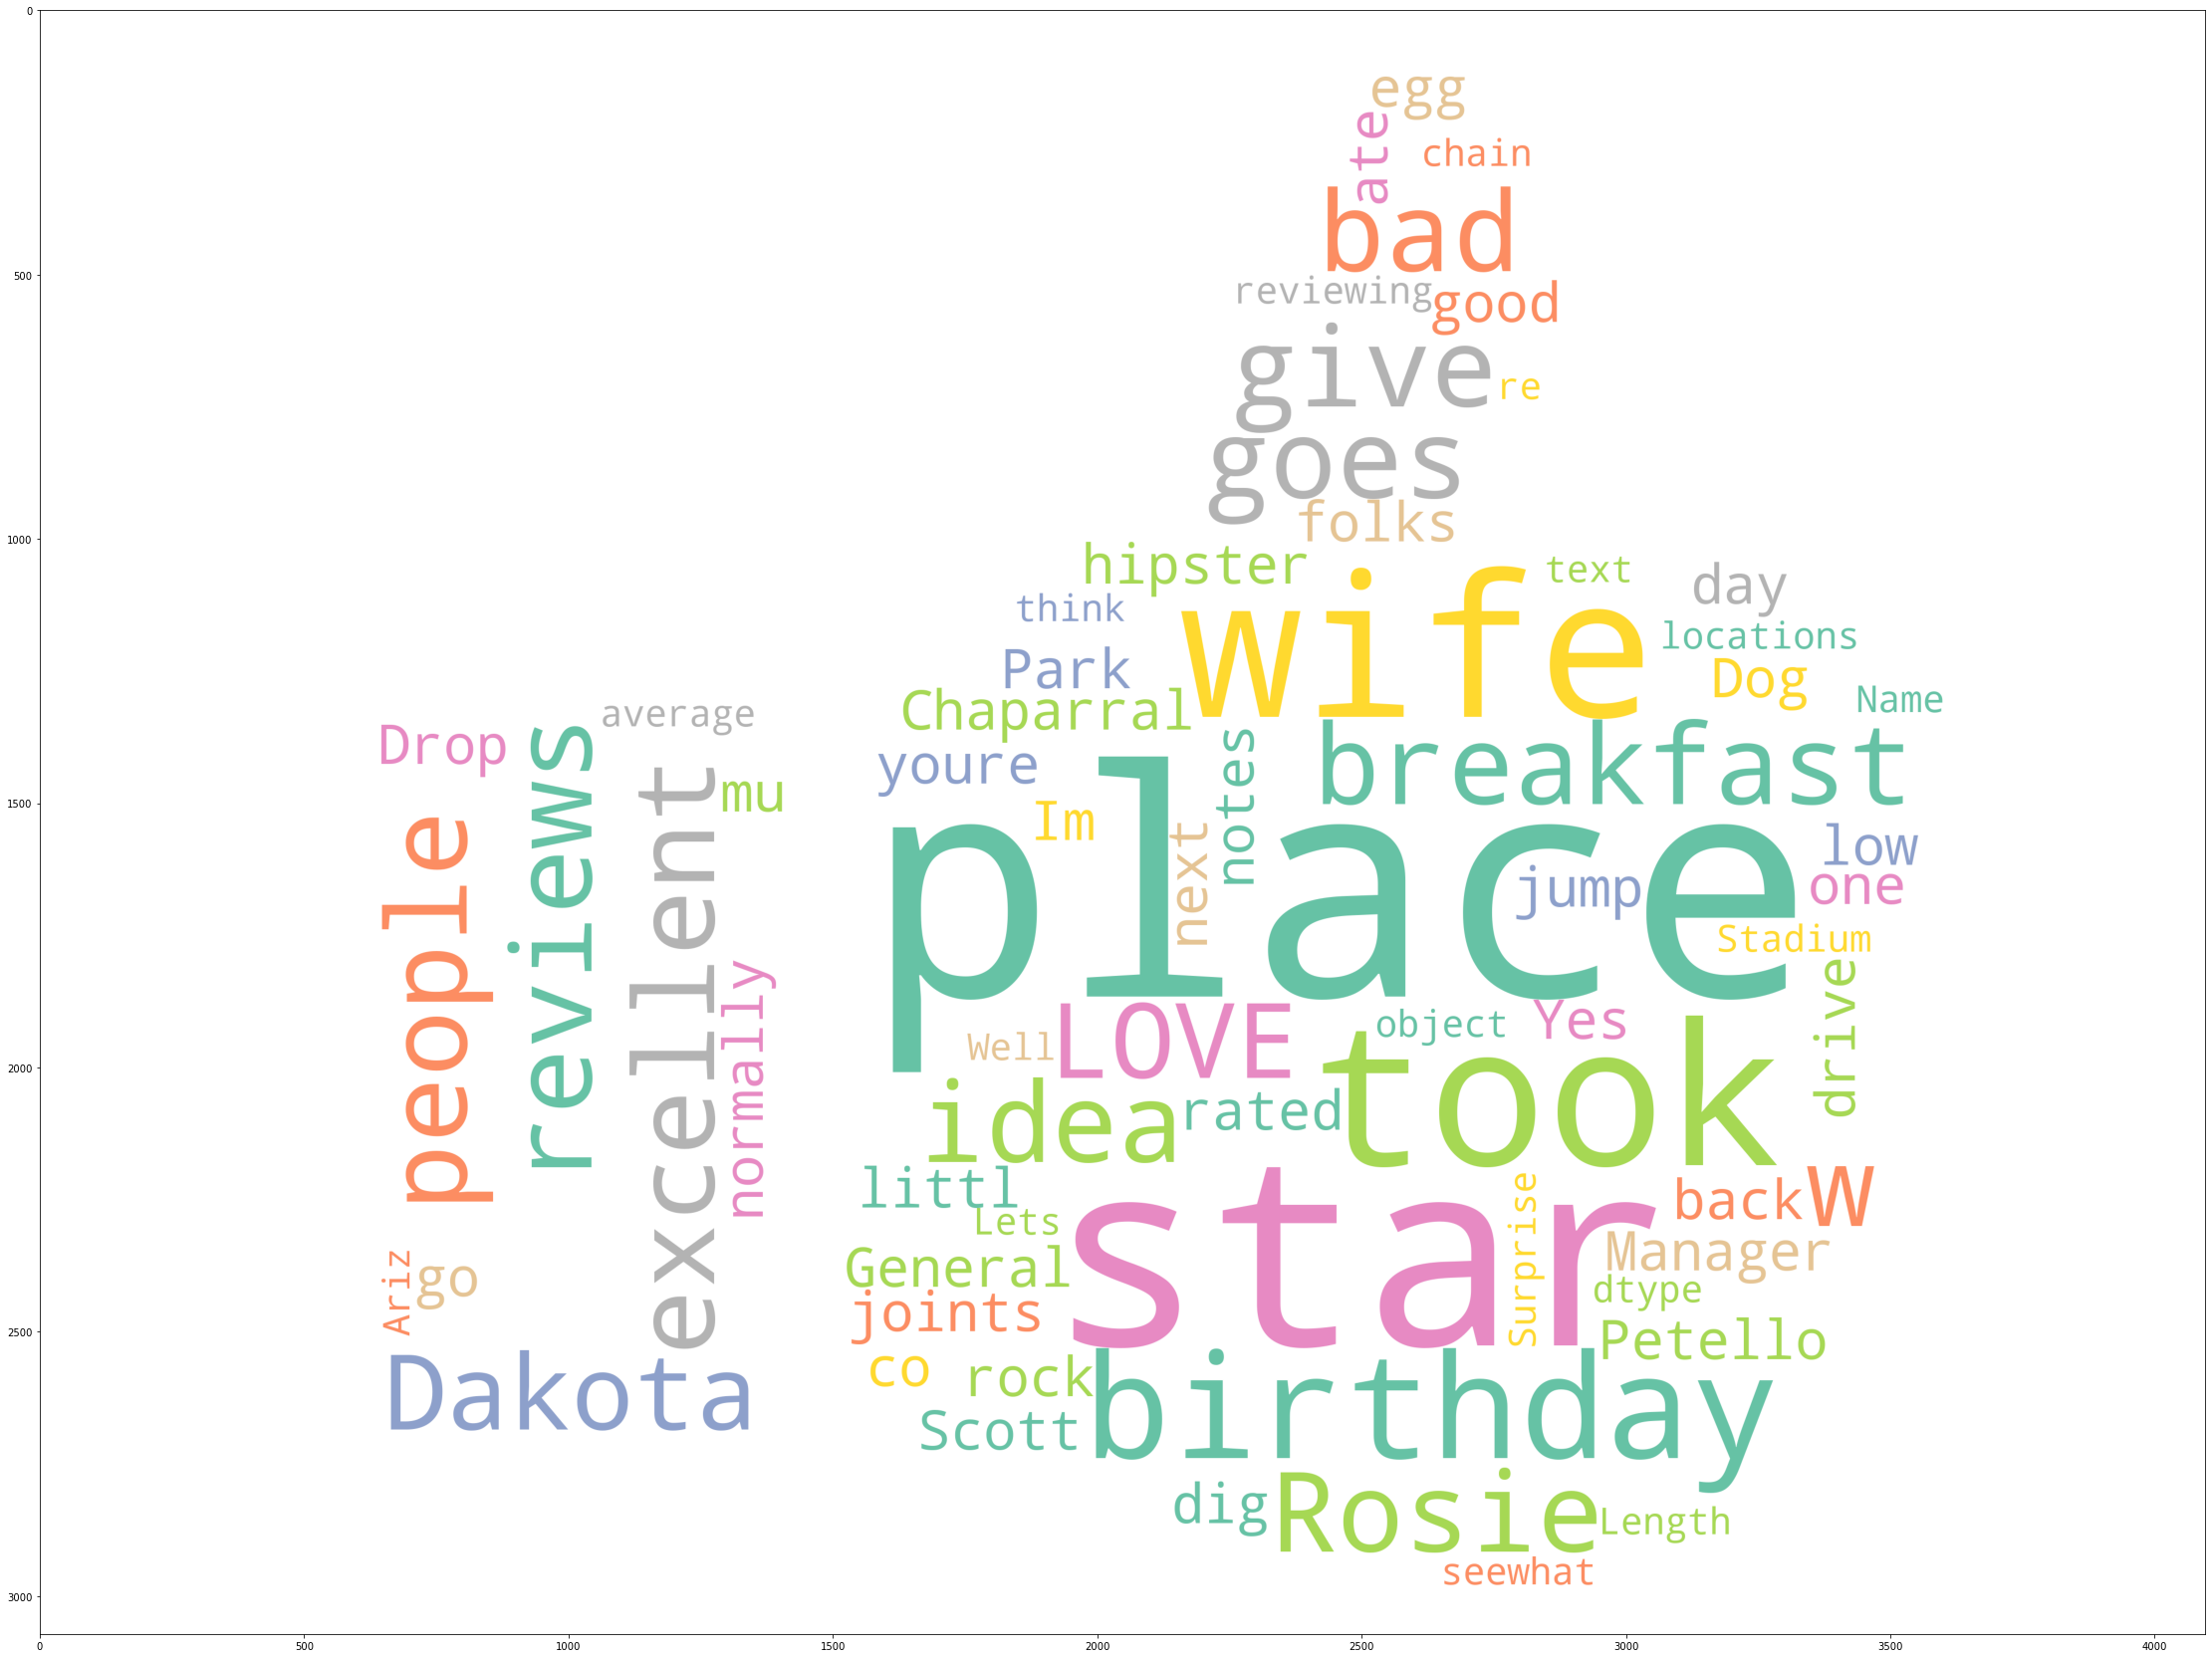

In [219]:
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("on");


import numpy as np
from PIL import Image
# Import image to np.array
mask = np.array(Image.open('/Users/margokim/Downloads/upvote.png'))
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
# Plot
plot_cloud(wordcloud)

In [220]:
wordcloud.to_file("worldcloud.png")